# Model Tuning

This notebook will demonstate how to automatically tune model hyperparameters for prediction accuracy.

## Set-Up
We will begin with some imports and then generate some training data using the simple cart-pole benchmark.

In [1]:
# Humanoid-v2 will crash the notebook 
gym_names = ["HalfCheetah-v2", "Hopper-v2", "Walker2d-v2", "Swimmer-v2", "InvertedPendulum-v2", 
              "Reacher-v2", "InvertedDoublePendulum-v2", 
              "Ant-v2", "Humanoid-v2", "HumanoidStandup-v2"]
name = gym_names[0]

In [2]:
import os
os.chdir('/home/baoyu/baoyul2/autompc')
import autompc as ampc
import numpy as np

from autompc.benchmarks import CartpoleSwingupBenchmark
from autompc.benchmarks.halfcheetah import HalfcheetahBenchmark, MetaBenchmark
from autompc.benchmarks.meta_benchmarks.reacher import ReacherBenchmark
from autompc.benchmarks.meta_benchmarks.ant import AntBenchmark
from autompc.benchmarks.meta_benchmarks.idp import IDPBenchmark

# benchmark = CartpoleSwingupBenchmark()
benchmark = HalfcheetahBenchmark(name)
# benchmark = MetaBenchmark()

# benchmark = ReacherBenchmark()
# benchmark = AntBenchmark()
# benchmark = IDPBenchmark()

system = benchmark.system
trajs = benchmark.gen_trajs(seed=100, n_trajs=100, traj_len=200)

Loading AutoMPC...


/home/baoyu/anaconda3/envs/autompc/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/home/baoyu/anaconda3/envs/autompc/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Finished loading AutoMPC
HalfCheetah-v2


/home/baoyu/anaconda3/envs/autompc/lib/python3.9/site-packages/gym/envs/registration.py:593: UserWarning: WARN: The environment HalfCheetah-v2 is out of date. You should consider upgrading to version `v4`.
  logger.warn(
/home/baoyu/anaconda3/envs/autompc/lib/python3.9/site-packages/gym/envs/mujoco/mujoco_env.py:237: UserWarning: WARN: This version of the mujoco environments depends on the mujoco-py bindings, which are no longer maintained and may stop working. Please upgrade to the v4 versions of the environments (which depend on the mujoco python bindings instead), unless you are trying to precisely replicate previous works).
  logger.warn(
/home/baoyu/anaconda3/envs/autompc/lib/python3.9/site-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/baoyu/anaconda3/envs/autompc/lib/p

In [12]:
# meta world stat
names = ['assembly-v2', 'basketball-v2', 'bin-picking-v2', 'box-close-v2', 
                'button-press-topdown-v2', 'button-press-topdown-wall-v2', 'button-press-v2', 
                'button-press-wall-v2', 'coffee-button-v2', 'coffee-pull-v2', 'coffee-push-v2', 
                'dial-turn-v2', 'disassemble-v2', 'door-close-v2', 'door-lock-v2', 'door-open-v2', 
                'door-unlock-v2', 'hand-insert-v2', 'drawer-close-v2', 'drawer-open-v2', 'faucet-open-v2', 
                'faucet-close-v2', 'hammer-v2', 'handle-press-side-v2', 'handle-press-v2', 'handle-pull-side-v2', 
                'handle-pull-v2', 'lever-pull-v2', 'peg-insert-side-v2', 'pick-place-wall-v2', 'pick-out-of-hole-v2', 
                'reach-v2', 'push-back-v2', 'push-v2', 'pick-place-v2', 'plate-slide-v2', 'plate-slide-side-v2', 
                'plate-slide-back-v2', 'plate-slide-back-side-v2', 'peg-unplug-side-v2', 'soccer-v2', 'stick-push-v2', 
                'stick-pull-v2', 'push-wall-v2', 'reach-wall-v2', 'shelf-place-v2', 'sweep-into-v2', 
                'sweep-v2', 'window-open-v2', 'window-close-v2']

In [13]:
import os
os.chdir('/home/baoyu/baoyul2/autompc')
import autompc as ampc
import numpy as np
from autompc.benchmarks.halfcheetah import MetaBenchmark
# for name in names:
#     benchmark = MetaBenchmark(name=name)
name = names[0]
benchmark = MetaBenchmark(name=name)
    

assembly-v2


/home/baoyu/anaconda3/envs/autompc/lib/python3.9/site-packages/gym/spaces/box.py:128: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")


qpos [ 1.88261575e+00 -5.93460002e-01 -9.59474274e-01  1.64832847e+00
  9.23299010e-01  1.02688965e+00  2.32340576e+00 -1.71909125e-04
  1.71744846e-04  0.00000000e+00  6.00000024e-01  1.99999996e-02
  7.07106763e-01  1.36367940e-04  1.60057621e-04  7.07106768e-01]
qvel [ 3.29594892e-01  5.62470645e-01 -6.20149668e-01  1.94811348e-01
  9.38798805e-01  2.09966159e-01  2.09523279e+00  1.02772565e-06
  1.02595610e-06  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00]
obs [6.15235156e-03 6.00189827e-01 1.94301178e-01 1.00000000e+00
 1.29999989e-01 6.00000024e-01 1.99455024e-02 7.07106763e-01
 1.36367940e-04 1.60057621e-04 7.07106768e-01 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 6.15235156e-03 6.00189827e-01
 1.94301178e-01 1.00000000e+00 1.29999989e-01 6.00000024e-01
 1.99455024e-02 7.07106763e-01 1.36367940e-04 1.60057621e-04
 7.07106768e-01 0.00000000e+00 0.00000000e+00 0.00000

In [14]:
system = benchmark.system
trajs = benchmark.gen_trajs(seed=100, n_trajs=100, traj_len=200)

In [15]:
len(trajs[0].obs)

200

In [16]:
X = np.concatenate([traj.obs[:-1,:] for traj in trajs])
U = np.concatenate([traj.ctrls[:-1,:] for traj in trajs])
XU = np.concatenate((X, U), axis = 1) # stack X and U together
print("X {}; U {}; XU {}".format(X.shape, U.shape, XU.shape))


X (19900, 39); U (19900, 4); XU (19900, 43)


In [17]:
def transform_input(xu_means, xu_std, XU):
    XUt = []
    for i in range(XU.shape[1]):
        # DEBUG: Sometimes mean and std are 0
        # print("MLP DEBUG", xu_means[i], xu_std[i])
        if xu_std[i] == 0:
            print(i)
            
            XUt.append(XU[:,i] - xu_means[i])
        else:
            XUt.append((XU[:,i] - xu_means[i]) / xu_std[i])
    return np.vstack(XUt).T

In [18]:
# meta world
xu_means = np.mean(XU, axis=0)
xu_std = np.std(XU, axis=0)
print(len(xu_std))
print(xu_std)

43
[1.27846156e-01 1.83294508e-01 7.88241049e-01 2.34447399e-01
 7.83271608e-01 3.42321639e-01 3.84341434e-01 7.73934879e-02
 8.41971871e-03 4.69972468e-04 2.02911107e-05 1.78501909e-03
 7.07095553e-02 3.47350695e-04 6.61062802e-05 3.15096348e-04
 1.60987291e+00 2.64805709e+00 2.97513882e+00 4.90263888e+00
 3.02955293e+00 3.48979352e+00 3.00035367e+00 1.64984757e+00
 1.42325579e-01 5.07255351e-02 3.57985165e-04 5.13421395e-02
 5.34065346e-02 5.61499852e-03 1.20784478e-02 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 5.77659617e-01
 5.78164012e-01 5.76045740e-01 5.76439227e-01]


## Auto-Tuning

By default, AutoMPC's `ModelTuner` will auto-select from all available models to fit the trajectories as best as possible. The tuner by default will run for 10 iterations, but for real problems you will want to run for many, many more iterations (100s).

In [10]:
# metaworld
from autompc.tuning import ModelTuner
rng=np.random.default_rng(100)

tuner = ModelTuner(system,trajs,verbose=1)
print("Selecting from models",",".join(model.name for model in tuner.model.models))
tuned_model,tune_result = tuner.run(n_iters=2)

print("Selected model:",tuned_model.name)
print("Final cross-validated RMSE score:",tune_result.inc_costs[-1])

Cuda is used for GPytorch
Selecting from models MLP,ARX,Koopman,SINDy,ApproximateGPModel
Evaluating Cfg:
Configuration(values={
  'MLP:batchnorm': False,
  'MLP:hidden_size_1': 128,
  'MLP:hidden_size_2': 128,
  'MLP:lr': 0.001,
  'MLP:n_hidden_layers': '2',
  'MLP:nonlintype': 'relu',
  'model': 'MLP',
})

Seed 0 budget 0.0
100%|██████████| 200/200 [00:46<00:00,  4.31it/s]
Model Score  0.06613349092995373
Evaluating Cfg:
Configuration(values={
  'SINDy:poly_basis': 'true',
  'SINDy:poly_cross_terms': 'false',
  'SINDy:poly_degree': 4,
  'SINDy:threshold': 0.04301113125880565,
  'SINDy:time_mode': 'continuous',
  'SINDy:trig_basis': 'false',
  'model': 'SINDy',
})

Seed 0 budget 0.0


/home/baoyu/anaconda3/envs/autompc/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.32852e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/baoyu/anaconda3/envs/autompc/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.32852e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/baoyu/anaconda3/envs/autompc/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.32852e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/baoyu/anaconda3/envs/autompc/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.32852e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/baoyu/anaconda3/envs/autompc/lib/python3.9/site-packages/sklearn/linear_model/

Model Score  3.1199179412888705
100%|██████████| 200/200 [01:09<00:00,  2.86it/s]
Selected model: MLP
Final cross-validated RMSE score: 0.06613349092995373


In [11]:
# metaworld

tuner = ModelTuner(system,trajs,verbose=1)
print("Selecting from models",",".join(model.name for model in tuner.model.models))
tuned_model,tune_result = tuner.run(n_iters=2)

print("Selected model:",tuned_model.name)
print("Final cross-validated RMSE score:",tune_result.inc_costs[-1])

Cuda is used for GPytorch
Selecting from models MLP,ARX,Koopman,SINDy,ApproximateGPModel
Evaluating Cfg:
Configuration(values={
  'MLP:batchnorm': False,
  'MLP:hidden_size_1': 128,
  'MLP:hidden_size_2': 128,
  'MLP:lr': 0.001,
  'MLP:n_hidden_layers': '2',
  'MLP:nonlintype': 'relu',
  'model': 'MLP',
})

Seed 0 budget 0.0
100%|██████████| 200/200 [00:46<00:00,  4.35it/s]
Model Score  0.06613349092995373
Evaluating Cfg:
Configuration(values={
  'SINDy:poly_basis': 'true',
  'SINDy:poly_cross_terms': 'false',
  'SINDy:poly_degree': 4,
  'SINDy:threshold': 0.04301113125880565,
  'SINDy:time_mode': 'continuous',
  'SINDy:trig_basis': 'false',
  'model': 'SINDy',
})

Seed 0 budget 0.0


/home/baoyu/anaconda3/envs/autompc/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.32852e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/baoyu/anaconda3/envs/autompc/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.32852e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/baoyu/anaconda3/envs/autompc/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.32852e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/baoyu/anaconda3/envs/autompc/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.32852e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/baoyu/anaconda3/envs/autompc/lib/python3.9/site-packages/sklearn/linear_model/

Model Score  3.1199179412888705
100%|██████████| 200/200 [01:09<00:00,  2.87it/s]
Selected model: MLP
Final cross-validated RMSE score: 0.06613349092995373


In [4]:
print(tune_result.inc_cfg)

Configuration(values={
  'MLP:batchnorm': False,
  'MLP:hidden_size_1': 128,
  'MLP:hidden_size_2': 128,
  'MLP:lr': 0.001,
  'MLP:n_hidden_layers': '2',
  'MLP:nonlintype': 'relu',
  'model': 'MLP',
})



In [10]:
config_str = str(tune_result.inc_cfg)
print(config_str)

Configuration(values={
  'MLP:batchnorm': False,
  'MLP:hidden_size_1': 128,
  'MLP:hidden_size_2': 128,
  'MLP:lr': 0.001,
  'MLP:n_hidden_layers': '2',
  'MLP:nonlintype': 'relu',
  'model': 'MLP',
})



In [42]:
info = {
            'env': name,
            'final_score': tune_result.inc_costs[-1],
            'final_config': dict(tune_result.inc_cfg),
            'costs': tune_result.costs
        }

In [39]:
info = {
            'env': name,
            'final_score': 3,
            'final_config': dict(tune_result.inc_cfg),
            'costs': tune_result.costs
        }

In [43]:
import json
from ConfigSpace.read_and_write import json as config_json

with open('meta.json', 'w') as outfile:
    outfile.write(json.dumps(info, indent=2))

: 

In [13]:
import ConfigSpace
config = ConfigSpace(config_str)

TypeError: 'module' object is not callable

You can customize the behavior of tuning by specifying which evaluation strategy we wish to use.  Possible options include splitting method (holdout vs cross-validation), which horizon to measure predictions upon, and what scoring metric to use.  By default, ModelTuner uses 3-fold cross-validation and one-step RMSE.

Here's an example of customizing the evaluator to use with 10\% holdout and the RMSE metric with a 5-step prediction horizon.

In [ ]:
tuner = ModelTuner(system,trajs,eval_holdout=0.1,eval_folds=1,eval_metric='rmse',eval_horizon=5)

To customize behavior even further, we can use a `ModelEvaluator` class, which has various subclasses.  As an example, the HoldoutModelEvaluator is specified here.  The `evaluator` keyword to ModelTuner will specify an evaluator that overrides the default keyword arguments.

In [ ]:
from autompc.tuning import HoldoutModelEvaluator

evaluator = HoldoutModelEvaluator(trajs, metric="rmse", holdout_prop=0.1,
                                  rng=np.random.default_rng(100), horizon=20)
tuner = ModelTuner(system,trajs,evaluator=evaluator)

## Specifying the Model Class

In some cases we know which model class we wish to tune, and ModelTuner can also accept a specified class.  For example, we can consider the MLP model. Here we'll perform a much longer tuning run, so let this run for a few hours...

**Alternatively, you can save/load the tuning data from a prior run by setting `dump=False` in the following cell, and skipping the tuning altogether.**

In [4]:
from autompc.sysid import MLP

tuner = ModelTuner(system,trajs,MLP(system),verbose=True)
tuned_model, tune_result = tuner.run(n_iters=200,rng=np.random.default_rng(200))

Evaluating Cfg:
Configuration(values={
  'batchnorm': False,
  'hidden_size_1': 128,
  'hidden_size_2': 128,
  'lr': 0.001,
  'n_hidden_layers': '2',
  'nonlintype': 'relu',
})

Seed 0 budget 0.0
100%|██████████| 200/200 [00:44<00:00,  4.52it/s]

Target Algorithm returned NaN or inf as quality. Algorithm run is treated as CRASHED, cost is set to 2147483647.0 for quality scenarios. (Change value through "cost_for_crash"-option.)



Model Score  nan


FirstRunCrashedException: First run crashed, abort. Please check your setup -- we assume that your default configuration does not crashes. (To deactivate this exception, use the SMAC scenario option 'abort_on_first_run_crash'). Additional run info: {}

In [2]:
import pickle

#To dump tuning result, turn to True.  To load it, turn to False
DUMP = False
if DUMP:
    with open('tuned_mlp_model.pkl','wb') as f:
        pickle.dump(tuned_model,f)
    with open('mlp_model_tuning_result.pkl','wb') as f:
        pickle.dump(tune_result,f)
else:
    with open('tuned_mlp_model.pkl','rb') as f:
        tuned_model = pickle.load(f)
    with open('mlp_model_tuning_result.pkl','rb') as f:
        tune_result = pickle.load(f)

Let's check what configuration was selected by the tuner.

In [3]:
tune_result.inc_cfg

Configuration(values={
  'batchnorm': False,
  'hidden_size_1': 220,
  'hidden_size_2': 155,
  'lr': 0.000606990613048173,
  'n_hidden_layers': '2',
  'nonlintype': 'tanh',
})

We see that the tuner selected a 2-layer MLP with `tanh` activations. 

Before we move on, let's note that another option is to specify a set of model classes to use. To do so we can use the AutoSelectModel class as the model as follows:

In [ ]:
from autompc.sysid import SINDy
from autompc.sysid import AutoSelectModel

selector = AutoSelectModel(system,[MLP(system),SINDy(system)])
tuner = ModelTuner(system,trajs,model=selector)

## Visualizing the Results

We can now visualize the tuning results.  First, we will plot the tuning curve.  This shows the holdout set performance of the best-known model at different points over the course of the tuning process.

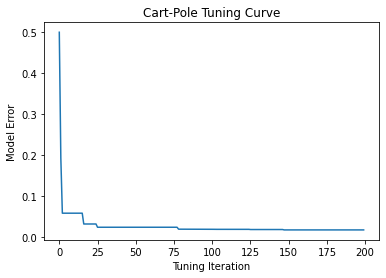

In [4]:
%matplotlib inline

from autompc.graphs import plot_tuning_curve,plot_tuning_correlations
import matplotlib.pyplot as plt

plot_tuning_curve(tune_result)
plt.title("Cart-Pole Tuning Curve")
plt.show()

To further study the tuning, we can examine how the cost correlates with various hyperparameter settings using the `plot_tuning_correlations` function.

[]

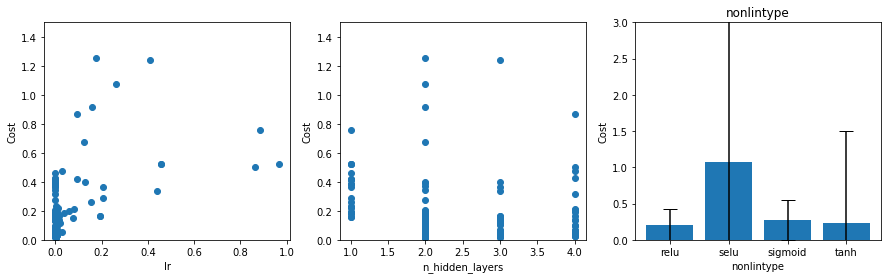

In [7]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,4))
plot_tuning_correlations(tune_result,'lr',ax=ax1)
plot_tuning_correlations(tune_result,'n_hidden_layers',ax=ax2)
plot_tuning_correlations(tune_result,'nonlintype',ax=ax3)
ax1.set_ylim(0,1.5)
ax2.set_ylim(0,1.5)
ax3.set_ylim(0,3.0)
ax3.set_title('nonlintype')
plt.plot()

Next, we can compare the performance of our tuned model to the default MLP configuration.  We will generate a fresh dataset for testing and compare over multiple prediction horizons.  For more details on how to do this comparison, see [2. Models].

100%|██████████| 50/50 [00:21<00:00,  2.30it/s]


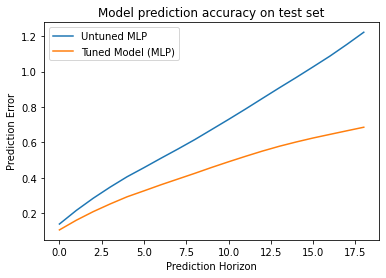

In [20]:
untuned_model = MLP(system)
untuned_model.train(trajs)

testing_set = benchmark.gen_trajs(seed=101, n_trajs=100, traj_len=200)

from autompc.graphs.kstep_graph import KstepPredAccGraph

graph = KstepPredAccGraph(system, testing_set, kmax=20, metric="rmse")
graph.add_model(untuned_model, "Untuned MLP")
graph.add_model(tuned_model, "Tuned Model (MLP)")

fig = plt.figure()
ax = fig.gca()
graph(fig, ax)
ax.set_title("Model prediction accuracy on test set")
plt.show()

As we can see, the tuned model outperforms the untuned model on the unseen dataset at all prediction horizons.

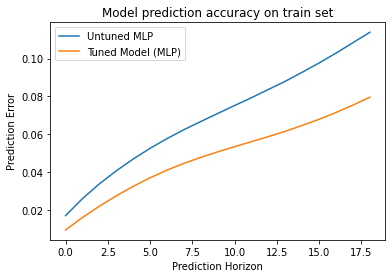

In [22]:
graph = KstepPredAccGraph(system, trajs, kmax=20, metric="rmse")
graph.add_model(untuned_model, "Untuned MLP")
graph.add_model(tuned_model, "Tuned Model (MLP)")

fig = plt.figure()
ax = fig.gca()
graph(fig, ax)
ax.set_title("Model prediction accuracy on training set")
plt.show()